In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [7]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
X = df.values[:, :4]
y = np.zeros(150)

In [11]:
le = preprocessing.LabelEncoder()
le.fit(df.values[:, 4])
y = le.transform(df.values[:, 4])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
d = distance.cdist(X_test,X_train,'euclidean')
print(d.shape)

(50, 100)


In [14]:
for i in range (50):
    z = np.argsort(d,axis=1)
    #print(y)
  

In [15]:
k = 11
y_pre = []
for j in range(50):
    y2 = np.zeros(3)
    for i in range (k):
        n=(z[j][i])
        val= y_train[n]
        y2[val]+=1
   
    y_pre.append(np.argmax(y2, axis=0))
#print(y_pre)
print("Accuracy Score: ",(accuracy_score(y_test, y_pre)))

Accuracy Score:  1.0


In [16]:
k = np.array([1,3,5,7,9,11,13,15])
res=[]

for k2 in k:
    y_pre=[]
    for j in range(50):
        y2 = np.zeros(3)
        for i in range (k2):
            n =(z[j][i])
            val= (y_train[n])
            y2[val]+=1
        
        y_pre.append(np.argmax(y2, axis=0))
    res.append(accuracy_score(y_test, y_pre))
   

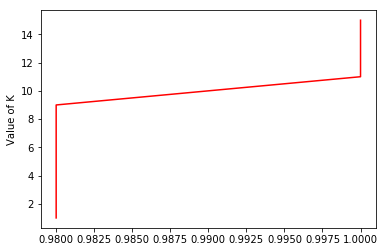

In [17]:
r=np.array(res)
plt.xlabel(" ")
plt.ylabel("Value of K")
plt.plot(r,k, color = 'R' )
plt.show()